Homework 4: Sentiment Analysis - Task 4
----

Names & Sections
----
Names: Alec Condry (4120) and Shrihari Subramaniam (4120)

Task 4: Neural Networks (20 points)
----

Next, we'll train a feedforward neural net to work with this data. You'll train one neural net which takes the same input as your Logistic Regression model - a sparse vector representing documents as bags of words.

In [1]:
import sentiment_utils as sutils
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

# you can experiment with having some Dropout layers if you'd like to
# this is not required
from keras.layers import Dropout

# if you want to use this again
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score

import collections
import random

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hsubr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)


print(train_tups[0][0])
print(train_tups[0][1])
print(train_tups[0][2])
print(train_tups[0][3])

print(train_tups[1][:4])

# Shape of train_tups and dev_tups

#    [ [ [...], [...], [...], [...], ..... 1600 length],
#      [   0,     1,     1,     0,   ..... 1600 length ]]


# you may use either your sparse vectors or sklearn's CountVectorizer's sparse vectors
# you will experiment with multinomial and binarized representations later


['Van', 'Dien', 'must', 'cringe', 'with', 'embarrassment', 'at', 'the', 'memory', 'of', 'this', 'ludicrously', 'poor', 'film', ',', 'as', 'indeed', 'must', 'every', 'single', 'individual', 'involved', '.', 'To', 'be', 'honest', 'I', 'am', 'rather', 'embarrassed', 'to', 'admit', 'I', 'watched', 'it', 'from', 'start', 'to', 'finish', '.', 'Production', 'values', 'are', 'somewhere', 'between', 'the', 'original', 'series', 'of', "'Crossroads", "'", 'and', "'Prisoner", 'Cell', 'Block', 'H', "'", '.', 'Most', 'five', 'year', 'olds', 'would', 'be', 'able', 'to', 'come', 'up', 'with', 'more', 'realistic', 'dialogue', 'and', 'a', 'more', 'plausible', 'plot', '.', 'As', 'for', 'the', 'acting', 'performances', ',', 'if', 'you', 'can', 'imagine', 'the', 'most', 'rubbish', 'porno', 'you', 'have', 'ever', 'seen', '-', 'one', 'of', 'those', 'ones', 'where', 'the', 'action', 'is', 'padded', 'out', 'with', 'some', 'interminable', "'story", "'", 'to', 'explain', 'how', 'some', 'pouting', 'old', 'peroxid

In [3]:
vocab = sutils.create_index(train_tups)

reviews_train = train_tups[0]
reviews_test = dev_tups[0]

X_train_multi = sutils.featurize(vocab=vocab, data_to_be_featurized_X=reviews_train, binary=False, verbose=False)
X_test_multi = sutils.featurize(vocab=vocab, data_to_be_featurized_X=reviews_test, binary=False, verbose=False)

X_train_bi = sutils.featurize(vocab=vocab, data_to_be_featurized_X=reviews_train, binary=True, verbose=False)
X_test_bi = sutils.featurize(vocab=vocab, data_to_be_featurized_X=reviews_test, binary=True, verbose=False)

y_train = train_tups[1]
y_test = dev_tups[1]

print(f'X_train_multi: \n{X_train_multi}')
print(f'X_test_multi: \n{X_test_multi}')
print(f'X_train_bi: \n{X_train_bi}')
print(f'X_test_bi: \n{X_test_bi}')
print(f'y_train: \n{y_train}')
print(f'y_test: \n{y_test}')

X_train_multi: 
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_test_multi: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_train_bi: 
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_test_bi: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train: 
[0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 

In [4]:
# Create a feedforward neural network model
# that takes a sparse BoW representation of the data as input
# and makes a binary classification of positive/negative sentiment as output
# you may use any number of hidden layers >= 1 and any number of units in each hidden layer (we recommend between 50-200)
# you may use any activation function on the hidden layers 
# you should use a sigmoid activation function on the output layer
# you should use binary cross-entropy as your loss function
# sgd is an appropriate optimizer for this task
# you should report accuracy as your metric
# you may add Dropout layers if you'd like to

# create/compile your model in this cell

model_multi = Sequential()

model_multi.add(Dense(units=50, activation='relu', input_dim=X_train_multi.shape[1]))

model_multi.add(Dense(units=100, activation='tanh', input_dim=X_train_multi.shape[1]))


# put in an output layer
model_multi.add(Dense(units=1, activation='softmax'))


model_multi.summary()
# call compile here

model_multi.compile(loss='binary_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1535300   
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1540501 (5.88 MB)
Trainable params: 1540501 (5.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model_bi = Sequential()

model_bi.add(Dense(units=200, activation='relu', input_dim=X_train_multi.shape[1]))

model_bi.add(Dense(units=50, activation='tanh', input_dim=X_train_multi.shape[1]))

model_bi.add(Dense(units=1, activation='sigmoid'))


model_bi.summary()

model_bi.compile(loss='binary_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               6141200   
                                                                 
 dense_4 (Dense)             (None, 50)                10050     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6151301 (23.47 MB)
Trainable params: 6151301 (23.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


How many trainable parameters does your model have? Our model has 6697601 trainable parameters.

In [6]:
# train your model
# Felix's computer takes about 2 sec for 3 epochs
# reports an accuracy of 0.78 at that point using the sgd optimizer

# Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})
# indicates you should change a list into a numpy array

print('Multinomial model fit')
model_multi.fit(np.array(X_train_multi), np.array(y_train), epochs=6, verbose=1)


Multinomial model fit
Epoch 1/6
50/50 [==============================] - 2s 11ms/step - loss: 0.6845 - accuracy: 0.5025
Epoch 2/6
50/50 [==============================] - 1s 11ms/step - loss: 0.6499 - accuracy: 0.5025
Epoch 3/6
50/50 [==============================] - 1s 11ms/step - loss: 0.6112 - accuracy: 0.5025
Epoch 4/6
50/50 [==============================] - 1s 11ms/step - loss: 0.5842 - accuracy: 0.5025
Epoch 5/6
50/50 [==============================] - 1s 11ms/step - loss: 0.5561 - accuracy: 0.5025
Epoch 6/6
50/50 [==============================] - 1s 12ms/step - loss: 0.5431 - accuracy: 0.5025


In [7]:
print('Binomial model fit')
model_bi.fit(np.array(X_train_bi), np.array(y_train), epochs=6, verbose=1)


Binomial model fit


Epoch 1/6
50/50 [==============================] - 2s 28ms/step - loss: 0.6861 - accuracy: 0.5731
Epoch 2/6
50/50 [==============================] - 1s 28ms/step - loss: 0.6487 - accuracy: 0.7369
Epoch 3/6
50/50 [==============================] - 1s 28ms/step - loss: 0.6028 - accuracy: 0.8131
Epoch 4/6
50/50 [==============================] - 1s 28ms/step - loss: 0.5513 - accuracy: 0.8500
Epoch 5/6
50/50 [==============================] - 1s 28ms/step - loss: 0.4975 - accuracy: 0.8687
Epoch 6/6
50/50 [==============================] - 1s 28ms/step - loss: 0.4481 - accuracy: 0.8875


In [8]:
# make a prediction on the dev set
# then make a classification decision based on that prediction
# predicting all examples takes < 1 sec on Felix's computer

multi_labels = model_multi.predict(X_test_multi)

multi_assigned_labels = [1 if y_hat_val > .5 else 0 for y_hat_val in multi_labels]
print("First 5 assigned probabilities for multinomial model:", multi_labels[:5])
print("First 5 assigned labels for multinomial model:", multi_assigned_labels[:5])

print(collections.Counter(multi_assigned_labels))

7/7 [==============================] - 0s 7ms/step
First 5 assigned probabilities for multinomial model: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
First 5 assigned labels for multinomial model: [1, 1, 1, 1, 1]
Counter({1: 200})


In [9]:
bi_labels = model_bi.predict(X_test_bi)

bi_assigned_labels = [1 if y_hat_val > .5 else 0 for y_hat_val in bi_labels]
print("First 5 assigned probabilities for binomial model:", bi_labels[:5])
print("First 5 assigned labels for binomial model:", bi_assigned_labels[:5])

7/7 [==============================] - 0s 8ms/step
First 5 assigned probabilities for binomial model: [[0.61068416]
 [0.5132668 ]
 [0.16232474]
 [0.7948091 ]
 [0.5981601 ]]
First 5 assigned labels for binomial model: [1, 1, 0, 1, 1]


In [10]:
# use the model.evaluate function to report the loss and accuracy on the dev set
score = model_multi.evaluate(np.array(X_test_multi), np.array(y_test), verbose=1)
print('Test multinomial model loss:', score[0])
print('Test multinomial model accuracy:', score[1])

7/7 [==============================] - 0s 7ms/step - loss: 0.6079 - accuracy: 0.5250
Test multinomial model loss: 0.6078740954399109
Test multinomial model accuracy: 0.5249999761581421


In [11]:
score = model_bi.evaluate(np.array(X_test_bi), np.array(y_test), verbose=1)
print('Test binomial model loss:', score[0])
print('Test binomial model accuracy:', score[1])

7/7 [==============================] - 0s 11ms/step - loss: 0.5081 - accuracy: 0.8000
Test binomial model loss: 0.5080779194831848
Test binomial model accuracy: 0.800000011920929


Epoch 1/6
50/50 [==============================] - 2s 29ms/step - loss: 0.6868 - accuracy: 0.5594
Epoch 2/6
50/50 [==============================] - 1s 29ms/step - loss: 0.6491 - accuracy: 0.7469
Epoch 3/6
50/50 [==============================] - 1s 28ms/step - loss: 0.6037 - accuracy: 0.8194
Epoch 4/6
50/50 [==============================] - 1s 29ms/step - loss: 0.5507 - accuracy: 0.8519
Epoch 5/6
50/50 [==============================] - 1s 29ms/step - loss: 0.4997 - accuracy: 0.8681
Epoch 6/6
7/7 [==============================] - 0s 8ms/step
Epoch 1/6
50/50 [==============================] - 2s 29ms/step - loss: 0.6856 - accuracy: 0.5612
Epoch 2/6
50/50 [==============================] - 1s 28ms/step - loss: 0.6440 - accuracy: 0.7525
Epoch 3/6
50/50 [==============================] - 1s 29ms/step - loss: 0.5948 - accuracy: 0.8125
Epoch 4/6
50/50 [==============================] - 1s 28ms/step - loss: 0.5451 - accuracy: 0.8475
Epoch 5/6
50/50 [==============================] - 1s 28m

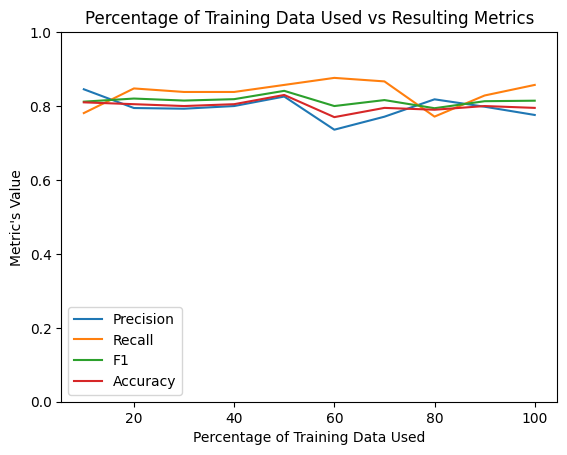

Epoch 1/6
50/50 [==============================] - 2s 29ms/step - loss: 0.6817 - accuracy: 0.5900
Epoch 2/6
50/50 [==============================] - 1s 29ms/step - loss: 0.6414 - accuracy: 0.7750
Epoch 3/6
50/50 [==============================] - 1s 29ms/step - loss: 0.5924 - accuracy: 0.8031
Epoch 4/6
50/50 [==============================] - 1s 29ms/step - loss: 0.5429 - accuracy: 0.8519
Epoch 5/6
50/50 [==============================] - 1s 29ms/step - loss: 0.4935 - accuracy: 0.8700
Epoch 6/6
7/7 [==============================] - 0s 9ms/step
Epoch 1/6
50/50 [==============================] - 2s 29ms/step - loss: 0.6834 - accuracy: 0.5800
Epoch 2/6
50/50 [==============================] - 1s 29ms/step - loss: 0.6468 - accuracy: 0.7513
Epoch 3/6
50/50 [==============================] - 1s 29ms/step - loss: 0.6058 - accuracy: 0.8075
Epoch 4/6
50/50 [==============================] - 1s 30ms/step - loss: 0.5611 - accuracy: 0.8413
Epoch 5/6
50/50 [==============================] - 2s 32m

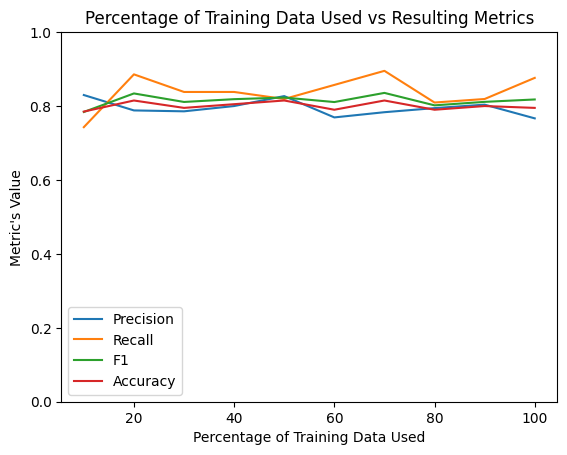

Epoch 1/6
50/50 [==============================] - 2s 29ms/step - loss: 0.6808 - accuracy: 0.5863
Epoch 2/6
50/50 [==============================] - 1s 29ms/step - loss: 0.6277 - accuracy: 0.7694
Epoch 3/6
50/50 [==============================] - 1s 30ms/step - loss: 0.5721 - accuracy: 0.8363
Epoch 4/6
50/50 [==============================] - 1s 29ms/step - loss: 0.5141 - accuracy: 0.8669
Epoch 5/6
50/50 [==============================] - 1s 29ms/step - loss: 0.4602 - accuracy: 0.8850
Epoch 6/6
7/7 [==============================] - 0s 8ms/step
Epoch 1/6
50/50 [==============================] - 2s 29ms/step - loss: 0.6825 - accuracy: 0.5600
Epoch 2/6
50/50 [==============================] - 1s 29ms/step - loss: 0.6299 - accuracy: 0.7563
Epoch 3/6
50/50 [==============================] - 1s 29ms/step - loss: 0.5717 - accuracy: 0.8388
Epoch 4/6
50/50 [==============================] - 1s 29ms/step - loss: 0.5118 - accuracy: 0.8725
Epoch 5/6
50/50 [==============================] - 1s 29m

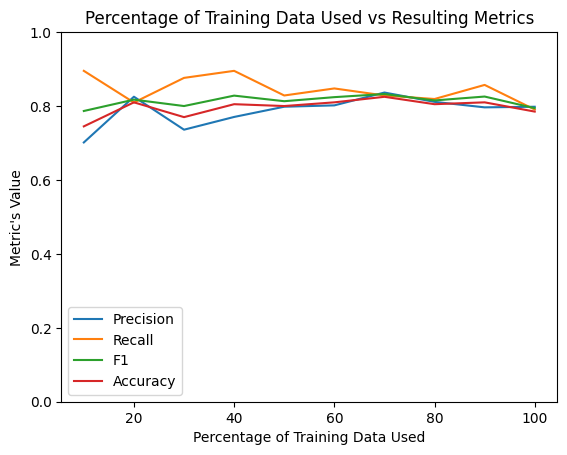

In [12]:
# create the same graph as with NB and LR, with your neural network model instead!
# make sure to re-create your model each time you train it — you don't want to start with
# an already trained network!

# For a model with one hidden layer of 50 units:
# Takes < 15 sec to run on Felix's computer w/ 3 epochs
# Takes < 30 sec to run on Felix's computer w/ 10 epochs
# Takes < 50 sec to run on Felix's computer w/ 20 epochs
# you need not train your model more than 20 epochs
# you should experiment with different numbers of epochs to see how performance varies
# you need not create an experiment that takes > 10 min to run (please do not do this)
num_classifiers = 10
data_len = len(X_train_bi)

for g in range(0, 3):
    metrics = []
    indicies = [x for x in range(0, data_len)]
    random.shuffle(indicies)
    for i in range(0, num_classifiers):
        model_bi = Sequential()
        model_bi.add(Dense(units=200, activation='relu', input_dim=X_train_multi.shape[1]))
        model_bi.add(Dense(units=50, activation='tanh', input_dim=X_train_multi.shape[1]))
        model_bi.add(Dense(units=1, activation='sigmoid'))
        model_bi.compile(loss='binary_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])
        end = data_len // num_classifiers * (i + 1)
        slice_X_train_bi = [X_train_bi[i] for i in indicies[0:end]]
        slice_y_train = [y_train[i] for i in indicies[0:end]]
        model_bi.fit(np.array(X_train_bi), np.array(y_train), epochs=6, verbose=1)
        bi_assigned_labels = [1 if y_hat_val > .5 else 0 for y_hat_val in model_bi.predict(X_test_bi)]
        metrics.append(sutils.get_prfa(y_test, bi_assigned_labels))
    sutils.create_training_graph(metrics, "NeuralNetwork", g, "./", False)


In [13]:
print(f'F1 Score for multinomial model: {f1_score(y_test, multi_assigned_labels)}')
print(f'F1 Score for binomial model: {f1_score(y_test, bi_assigned_labels)}')

F1 Score for multinomial model: 0.6885245901639345
F1 Score for binomial model: 0.7942583732057416


Report the f1 scores for your model with the following settings, using the same number of epochs to train in both cases:
- number of epochs used: 6 epochs
- multinomial features: .6885
- binarized features: .7905